In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
from datetime import datetime
from matplotlib import dates
warnings.filterwarnings('ignore')

# Load dataset and convert date into datetimeformat and make 3 new columns for date, month and year


In [3]:
data = pd.read_csv("Walmart_Store_sales.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


# TO FIND WHICH STORE AS MAXIMUM SALES

Store Number 20 has maximum Sales. Sum of Total Sales $ 301397792.46


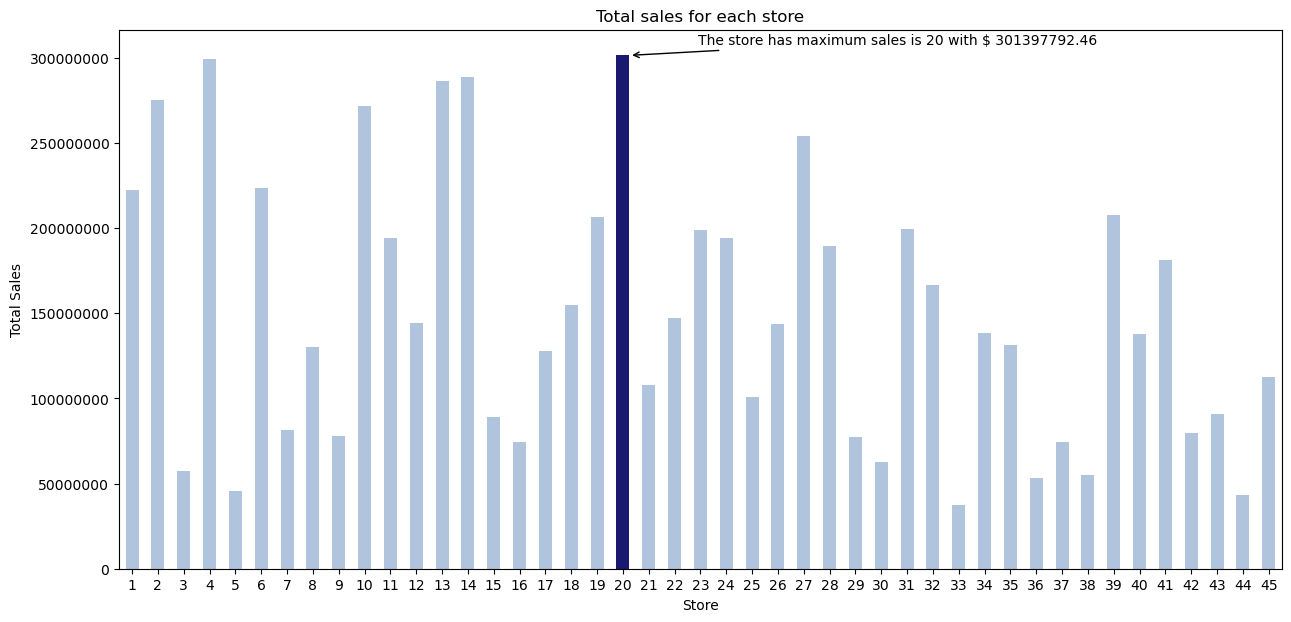

In [5]:
max_sale_data = data.groupby('Store')['Weekly_Sales'].sum()
print("Store Number {} has maximum Sales. Sum of Total Sales $ {}".format(max_sale_data.idxmax(),
                                                                            max_sale_data.max()))

plt.figure(figsize=(15,7))
max_sale_data_array = np.array(max_sale_data)
clrs = ['lightsteelblue' if (x < max(max_sale_data_array)) else 'midnightblue' for x in max_sale_data_array]
ax = max_sale_data.plot(kind='bar',color=clrs)
p = ax.patches[19]
ax.annotate("The store has maximum sales is 20 with $ {0:.2f}".format(p.get_height()), 
                xy=(p.get_x()+0.5, p.get_height()), 
                xycoords='data',xytext=(0.67, 0.98), 
                textcoords='axes fraction',arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                horizontalalignment='center', verticalalignment='center')
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [6]:
std_data = data.groupby('Store').agg({'Weekly_Sales':'std'})
print("Store Number {} has maximum Standard Deviation. STD {}".format(std_data['Weekly_Sales'].idxmax(),
                                                                        std_data['Weekly_Sales'].max()))

Store Number 14 has maximum Standard Deviation. STD 317569.9494755081


# Find out the coefficient of mean to standard deviation


In [7]:
mean_to_std = data.groupby('Store').agg({'Weekly_Sales':['mean','std']})
mean_to_std.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

# TO FIND WHICH STORE/s HAS A GOOD QUATERLY GROWTH RATE IN Q3 2012  

In [8]:
growth_rate_Q32012 = data[(data['Date'] >= '2012-07-01') & 
                            (data['Date'] <= '2012-09-30')].groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has Good Quartely Growth in Q3'2012 {}".format(growth_rate_Q32012.idxmax(),growth_rate_Q32012.max()))

Store Number 4 has Good Quartely Growth in Q3'2012 25652119.35


# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [9]:
# Holiday Events
# Super Bowl:   12-Feb-10,  11-Feb-11,   10-Feb-12,  8-Feb-13
# Labour Day:   10-Sep-10,  9-Sep-11,    7-Sep-12,   6-Sep-13
# Thanksgiving: 26-Nov-10,  25-Nov-11,   23-Nov-12,  29-Nov-13
# Christmas:    31-Dec-10,  30-Dec-11,   28-Dec-12,  27-Dec-13

sales_on_holiday = data[data['Holiday_Flag'] == 1]
sales_on_non_holiday = data[data['Holiday_Flag'] == 0]

holiday_sales_on_super_bowl = sales_on_holiday[(pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('12-02-2010')) |
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('11-02-2011'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('10-02-2012'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('08-02-2013'))]

holiday_sales_on_labour_day = sales_on_holiday[(pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('10-09-2010')) |
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('09-09-2011'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('07-09-2012'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('06-09-2013'))]

holiday_sales_on_thanksgiving = sales_on_holiday[(pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('26-11-2010')) |
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('25-11-2011'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('23-11-2012'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('29-11-2013'))]

holiday_sales_on_christmas = sales_on_holiday[(pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('31-12-2010')) |
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('30-12-2011'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('28-12-2012'))|
                                                    (pd.to_datetime(sales_on_holiday['Date']) == pd.to_datetime('27-12-2013'))]   

total_holiday_sales = sales_on_holiday.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()     
mean_non_holiday_sales = sales_on_non_holiday.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()

for row in total_holiday_sales.itertuples():
    for row1 in mean_non_holiday_sales.itertuples():
        if row.Weekly_Sales > row1.Weekly_Sales:
            print("On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales : {}".format(row.Date.date(),row.Weekly_Sales))
            break;                                          

print()
print("Super Bowl Day total Sale",holiday_sales_on_super_bowl['Weekly_Sales'].sum())
print("Labour Day total Sale",holiday_sales_on_labour_day['Weekly_Sales'].sum())
print("Thanksgiving Day total Sale",holiday_sales_on_thanksgiving['Weekly_Sales'].sum())
print("Christmas Day total Sale",holiday_sales_on_christmas['Weekly_Sales'].sum())

On this Date 2010-10-09 Holiday Sales is greater than Non Holiday Sales and the Sales : 45634397.839999996
On this Date 2010-11-26 Holiday Sales is greater than Non Holiday Sales and the Sales : 65821003.24
On this Date 2010-12-02 Holiday Sales is greater than Non Holiday Sales and the Sales : 48336677.63
On this Date 2010-12-31 Holiday Sales is greater than Non Holiday Sales and the Sales : 40432519.0
On this Date 2011-09-09 Holiday Sales is greater than Non Holiday Sales and the Sales : 46763227.53
On this Date 2011-11-02 Holiday Sales is greater than Non Holiday Sales and the Sales : 47336192.79
On this Date 2011-11-25 Holiday Sales is greater than Non Holiday Sales and the Sales : 66593605.26
On this Date 2011-12-30 Holiday Sales is greater than Non Holiday Sales and the Sales : 46042461.04
On this Date 2012-07-09 Holiday Sales is greater than Non Holiday Sales and the Sales : 48330059.31
On this Date 2012-10-02 Holiday Sales is greater than Non Holiday Sales and the Sales : 500094

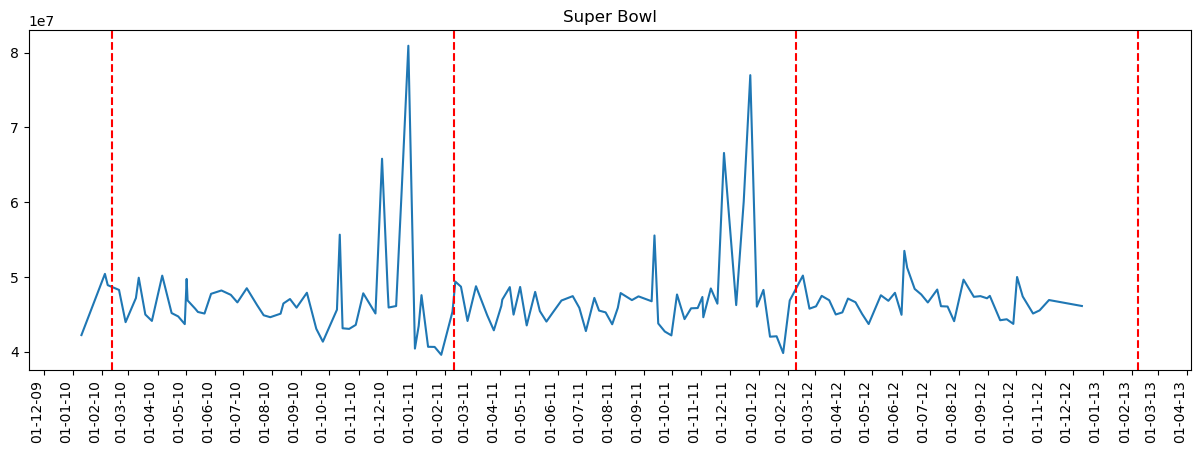

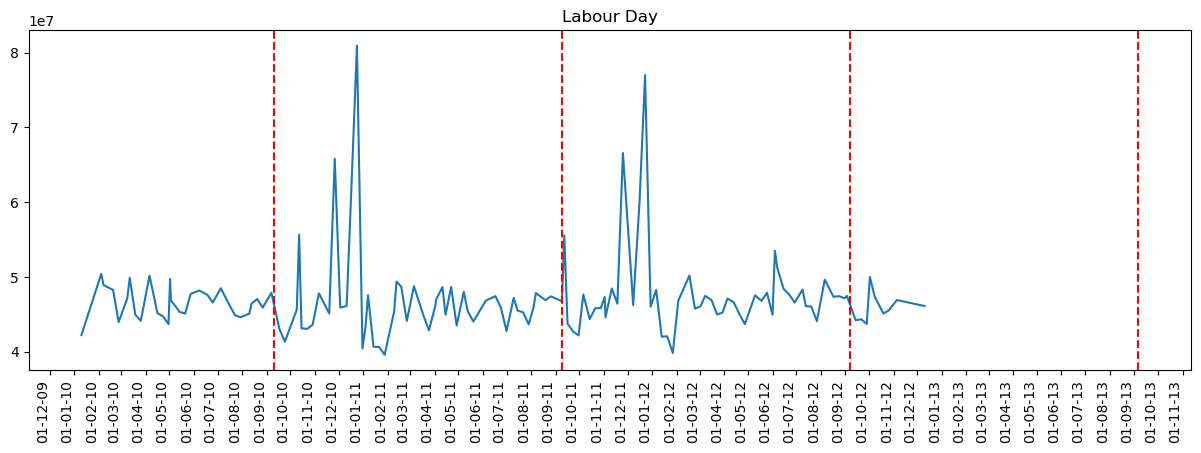

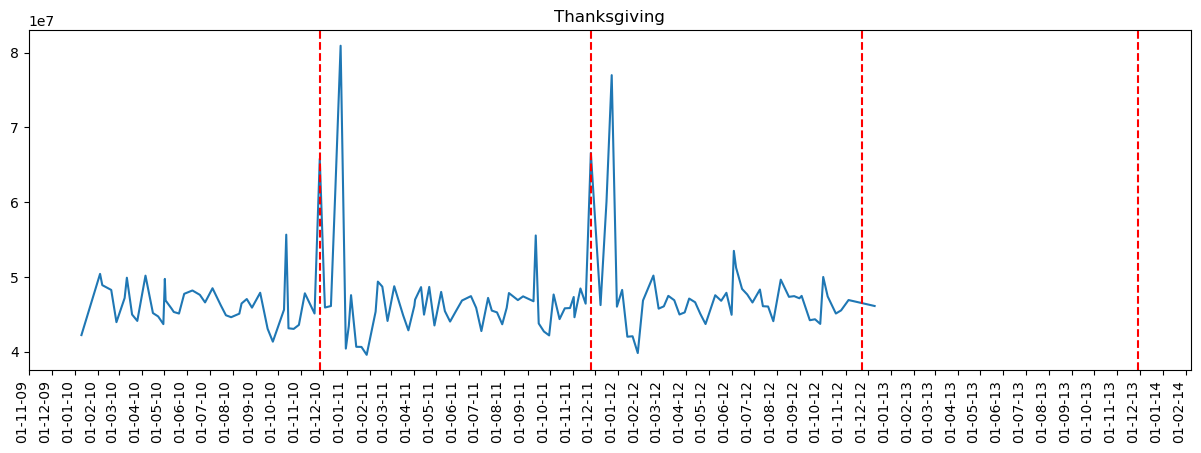

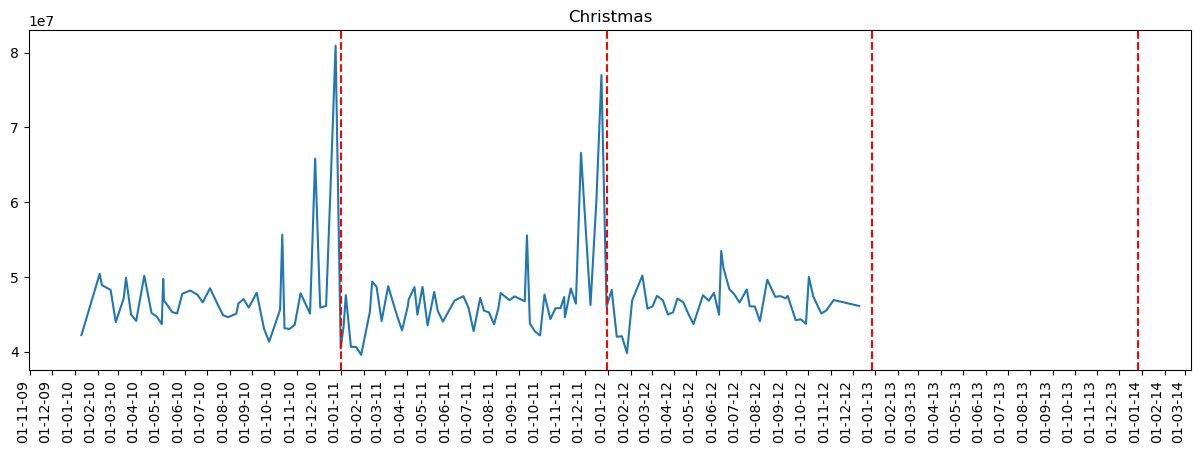

In [10]:
# Data visualization
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012', '8-2-2013']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012', '6-9-2013']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

The sales increased during thanksgiving. And the sales decreased during christmas.

# Provide a monthly and semester view of sales in units and give insights

In [11]:
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


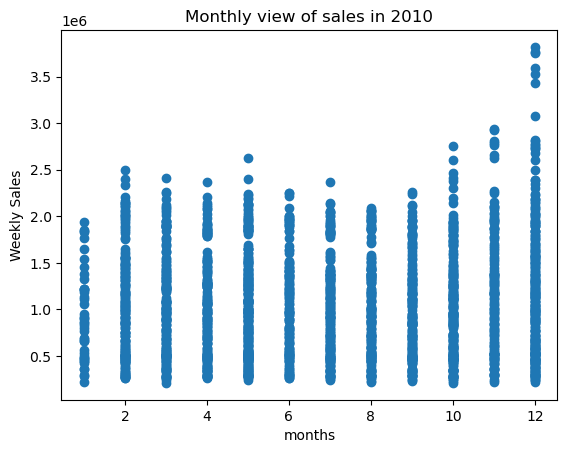

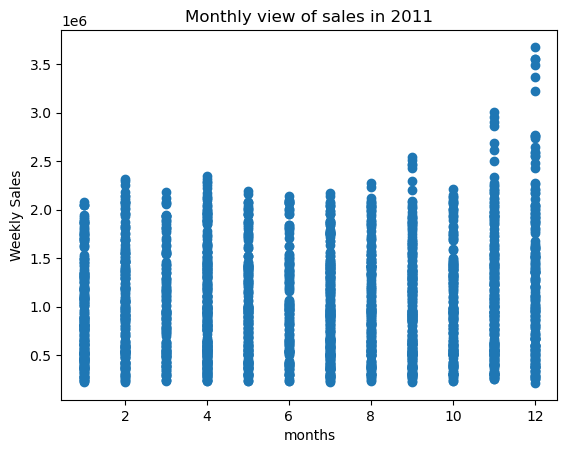

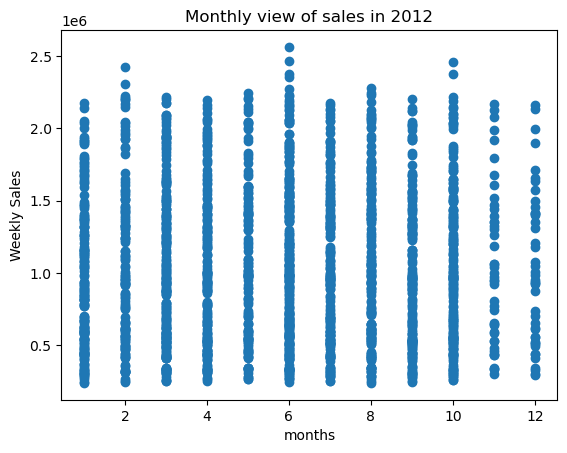

In [12]:
# Monthly view of sales for each years
plt.scatter(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

Text(0.5, 1.0, 'Monthly view of sales')

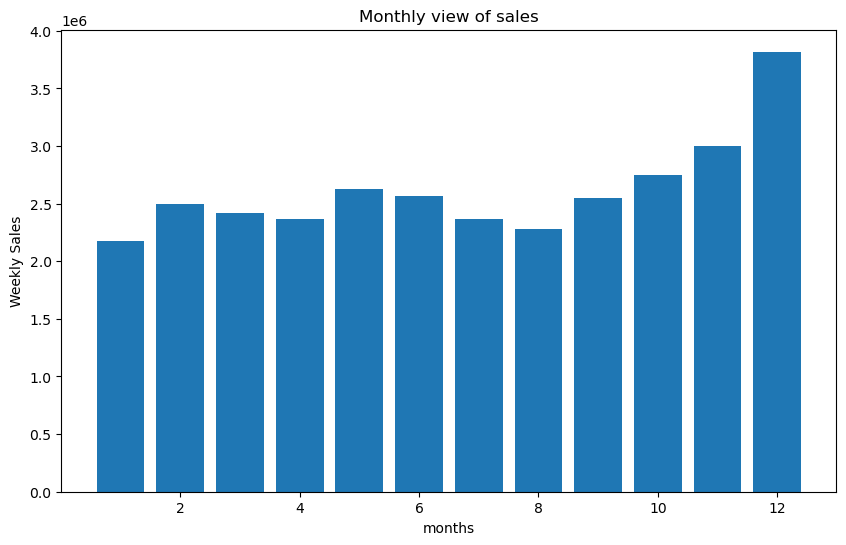

In [13]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

<Figure size 1000x600 with 0 Axes>

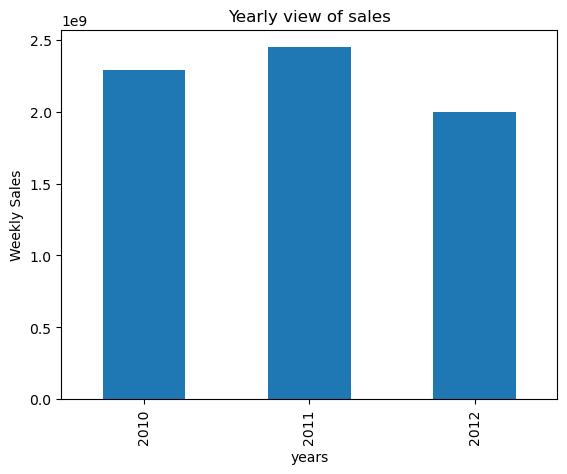

In [14]:
# Yearly view of sales
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

# For Store 1 – Build prediction models to forecast demand

In [15]:
x_features_object = data[data['Store'] ==1][['Store','Date']]
date_obj = data[data['Store'] ==1][['Date']]
date_obj.index +=1
x_features_object.Date = date_obj.index
x_features_object.head()

,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [18]:
y_target = data[data['Store'] ==1]['Weekly_Sales']
y_target.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [20]:
#Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb #2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and #fuel price have any impact on sales.

x_train,x_test,y_train,y_test = train_test_split(x_features_object,y_target,random_state=1)
linreg = LinearRegression()
linreg.fit(x_train,y_train)

feature_dataset = data[data['Store'] ==1][['Store','CPI','Unemployment','Fuel_Price']]
feature_dataset.head()

response_set_cpi = data[data['Store'] ==1]['CPI'].astype('int64')
response_set_unemployment = data[data['Store'] ==1]['Unemployment'].astype('int64')


x_train_cpi,x_test_cpi,y_train_cpi,y_test_cpi = train_test_split(feature_dataset,response_set_cpi,random_state=1)
x_train_unemp,x_test_unemp,y_train_unemp,y_test_unemp = train_test_split(feature_dataset,response_set_unemployment,random_state=1)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train_cpi,y_train_cpi)
y_pred = logreg.predict(x_test_cpi)

logreg.fit(x_train_unemp,y_train_unemp)
y_pred_unemp = logreg.predict(x_test_unemp)

print("Accuracy Score for Logistic Regression")
print(metrics.accuracy_score(y_test_cpi,y_pred))
print(metrics.accuracy_score(y_test_unemp,y_pred_unemp))

print()
print('cpi actual :', y_test_cpi.values[0:30])
print('cpi Predicted :', y_pred[0:30])
print('actual Unemployment :', y_test_unemp.values[0:30])
print('Predicted Unemployment :', y_pred_unemp[0:30])

Accuracy Score for Logistic Regression
0.7222222222222222
0.9444444444444444

cpi actual : [215 221 211 211 221 211 210 211 215 217 221 212 216 218 211 210 211 217
 215 211 212 217 221 219 214 211 211 219 215 219]
cpi Predicted : [215 221 211 211 221 211 211 211 215 215 221 211 215 218 211 211 211 217
 215 211 211 217 221 221 215 211 211 221 215 220]
actual Unemployment : [7 7 7 8 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Predicted Unemployment : [7 7 7 7 6 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


# Change dates into days by creating new variable.

In [21]:
data['Day'] = pd.to_datetime(data['Date']).dt.day_name()
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday,5,2010
